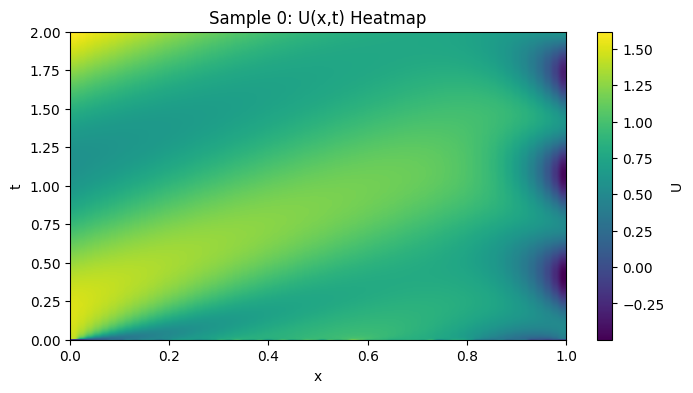

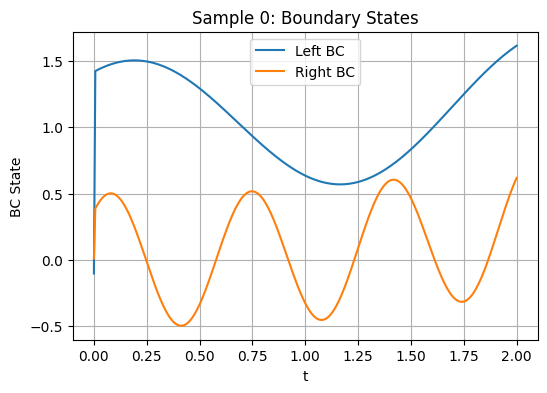

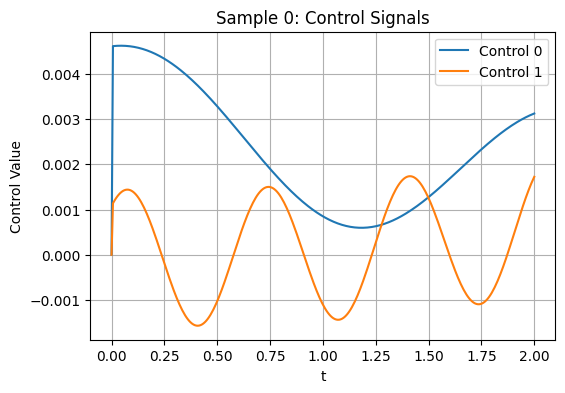

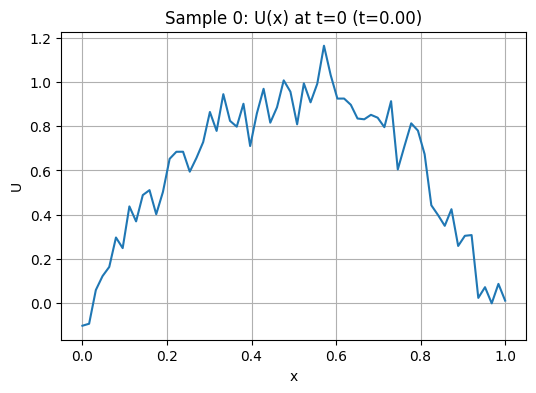

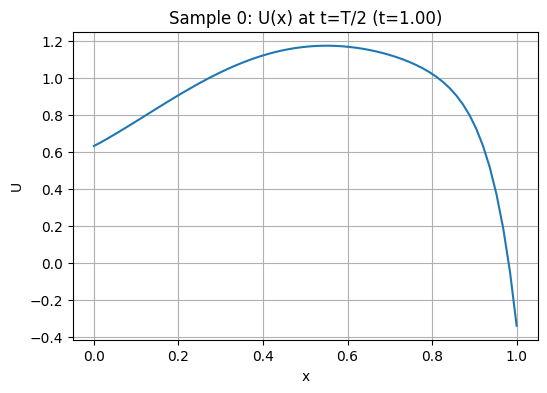

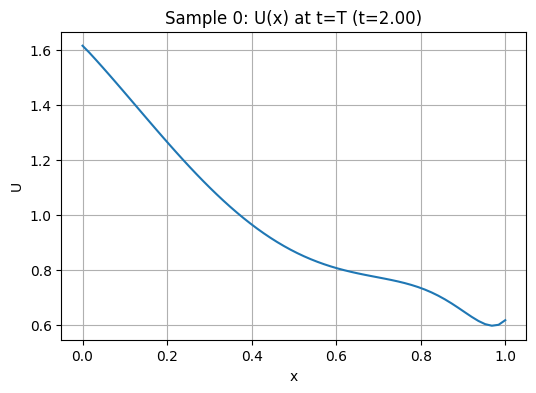

In [12]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

def visualize_sample(sample, idx=0):
    """
    Visualize a single sample from the dataset.

    Parameters:
    - sample: dict with keys 'U', 'BC_State', 'BC_Control', 'params'
    - idx: sample index for title purposes
    """
    U = sample['U']               # shape: (nt, nx)
    BC_State = sample['BC_State'] # shape: (nt, 2)
    BC_Control = sample['BC_Control'] # shape: (nt, num_controls)
    params = sample['params']
    
    nt, nx = U.shape
    L = params.get('L', 1.0)
    T = params.get('T', params.get('T_final', 1.0))
    
    x = np.linspace(0, L, nx)
    t = np.linspace(0, T, nt)
    
    # 1) U(x,t) heatmap
    plt.figure(figsize=(8, 4))
    plt.imshow(U, aspect='auto', extent=[x.min(), x.max(), t.min(), t.max()], origin='lower')
    plt.colorbar(label='U')
    plt.title(f"Sample {idx}: U(x,t) Heatmap")
    plt.xlabel('x')
    plt.ylabel('t')
    plt.show()
    
    # 2) Boundary states over time
    plt.figure(figsize=(6, 4))
    plt.plot(t, BC_State[:, 0], label='Left BC')
    plt.plot(t, BC_State[:, 1], label='Right BC')
    plt.title(f"Sample {idx}: Boundary States")
    plt.xlabel('t')
    plt.ylabel('BC State')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    # 3) Control signals over time
    num_controls = BC_Control.shape[1]
    plt.figure(figsize=(6, 4))
    for i in range(num_controls):
        plt.plot(t, BC_Control[:, i], label=f'Control {i}')
    plt.title(f"Sample {idx}: Control Signals")
    plt.xlabel('t')
    plt.ylabel('Control Value')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    # 4) Spatial profiles at t=0, t=T/2, t=T
    for label, ti in [('t=0', 0), ('t=T/2', nt//2), ('t=T', nt-1)]:
        plt.figure(figsize=(6, 4))
        plt.plot(x, U[ti, :])
        plt.title(f"Sample {idx}: U(x) at {label} (t={t[ti]:.2f})")
        plt.xlabel('x')
        plt.ylabel('U')
        plt.grid(True)
        plt.show()

# Example usage in a notebook:
# ---------------------------
# 1. Set the path to your .pkl file:
file_path = './datasets_integral_feedback/heat_delayed_feedback_v1_5000s_64nx_300nt.pkl'
#file_path = './datasets_integral_feedback/reaction_diffusion_neumann_feedback_v1_100s_64nx_300nt.pkl'
#ile_path = './datasets_integral_feedback/heat_nonlinear_feedback_gain_v1_100s_64nx_300nt.pkl'
file_path = './datasets_new_feedback/convdiff_v1_5000s_64nx_300nt.pkl'

# 2. Load the dataset:
with open(file_path, 'rb') as f:
    data = pickle.load(f)
# 3. Visualize a sample:
visualize_sample(data[50], idx=0)
#
# You can loop over samples or change idx as needed.


